In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [11]:
import pandas as pd
import requests
import io

# URL of the dataset
url = 'https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv'

# Download the dataset
response = requests.get(url)
response.raise_for_status()  # Check for errors

# Read the CSV file from the response content
dataset = pd.read_csv(io.StringIO(response.text))

# Display the last few rows of the DataFrame
print(dataset.tail())

      age     sex   bmi  children smoker     region  expenses
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36


In [12]:
catColumns = ["sex", "smoker", "region"]
dataset = pd.get_dummies(dataset, columns = catColumns, drop_first=True)

#Split train-test data as 80-20 
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#Pop the y label for train and test sets
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

c:\Users\Adisaputra Zidha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


array([[7.1316557],
       [6.9486847],
       [8.794935 ],
       [8.6262   ],
       [4.253411 ],
       [4.9539824],
       [6.3191586],
       [8.308256 ],
       [6.6356096],
       [6.4908934]], dtype=float32)

In [16]:
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:226753040.0000,  mae:9890.8984,  mse:226753040.0000,  val_loss:160295664.0000,  val_mae:8116.4106,  val_mse:160295664.0000,  
....................................................................................................
Epoch: 100, loss:29347898.0000,  mae:3372.7119,  mse:29347898.0000,  val_loss:31284208.0000,  val_mae:3519.2693,  val_mse:31284208.0000,  
....................................................................................................
Epoch: 200, loss:22611928.0000,  mae:2815.4927,  mse:22611928.0000,  val_loss:31665996.0000,  val_mae:3085.1235,  val_mse:31665996.0000,  
....................................................................................................
Epoch: 300, loss:21398026.0000,  mae:2726.5679,  mse:21398026.0000,  val_loss:21347144.0000,  val_mae:2723.5361,  val_mse:21347144.0000,  
....................................................................................................
Epoch: 400, loss:22089440.0000,  mae:

(0.0, 5000.0)

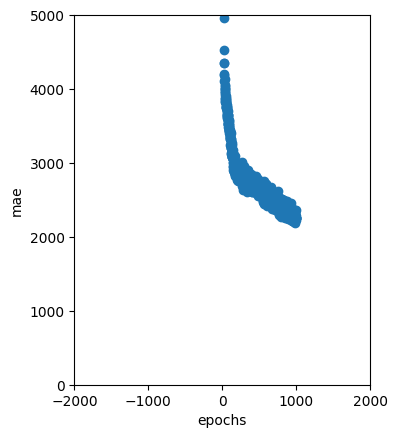

In [17]:
mae = history.history["mae"]
loss = history.history["loss"]
epoch = history.epoch

a = plt.axes(aspect='equal')
plt.scatter(epoch, mae)
plt.xlabel('epochs')
plt.ylabel('mae')
plt.xlim([-2000, 2000])
plt.ylim([0, 5000])

9/9 - 0s - 8ms/step - loss: 39962052.0000 - mae: 3392.4861 - mse: 39962052.0000
Testing set Mean Abs Error: 3392.49 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


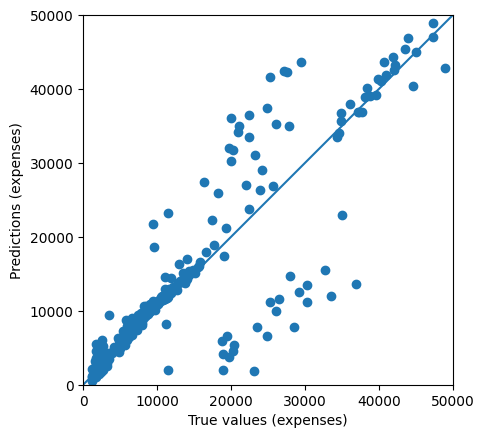

In [18]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
